# Intro to pandas and Seaborn

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns

# Pandas (for data)
An open source data analysis and manipulation tool, built on top of Python.

**References:**

[Pandas documentation](https://pandas.pydata.org/docs/). Dry and technical, but authoritative.

[Pandas tutorial](https://www.kaggle.com/learn/pandas) on Kaggle, good for practice and reference.

Soner Yildirim, "[30 Examples to Master Pandas](https://towardsdatascience.com/30-examples-to-master-pandas-f8a2da751fa4)" blog post on Towards Data Science (4 Nov 2020).

## Series
Series and DataFrames are the fundamental building blocks (data structures) in pandas.

A Series is a single-column list with an index.

In [4]:
# Make a series from a list
ser = pd.Series([5, 10, 7])

In [5]:
ser

0     5
1    10
2     7
dtype: int64

**Task 1:** Add a number to the series.

**Task 2:** Make one of the numbers a float (e.g., 7.5). Then run `ser.info()`. What does it do to the data type of the series?

## DataFrame
A DataFrame is a table, consisting of entries and values. Each entry corresponds to a row and column. Here we declare a dataframe using a dictionary whose keys are the column names, and the values are lists of entries.

In [6]:
# Make a dataframe from a dictionary and lists
df1 = pd.DataFrame({'Student': ['Bart', 'Lisa', 'Milhouse', 'Sideshow Bob'], 'Score':[5, 10, 7.5, 8.5], 'Hair colour':['Yellow', 'Yellow', 'Blue', 'Red']})

In [7]:
df1

,Student,Score,Hair colour
0,Bart,5.0,Yellow
1,Lisa,10.0,Yellow
2,Milhouse,7.5,Blue
3,Sideshow Bob,8.5,Red


**Task 1:** Add a student (after Sideshow Bob) and a score to the lists for 'Student' and 'Score'.

**Task 2:** Add a new column to the dataframe, titled 'Hair colour' (yellow, yellow, blue and red).

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Student      4 non-null      object 
 1   Score        4 non-null      float64
 2   Hair colour  4 non-null      object 
dtypes: float64(1), object(2)
memory usage: 224.0+ bytes


In [9]:
df1.shape

(4, 3)

### Selecting rows

In [11]:
# View selection
df1[df1['Student'].str.contains('Bart')]

,Student,Score,Hair colour
0,Bart,5.0,Yellow


In [12]:
# Select rows based on conditions, copy to new dataframe
df1_name = df1[df1['Student'] == 'Lisa']

In [13]:
df1_name

,Student,Score,Hair colour
1,Lisa,10.0,Yellow


In [17]:
# Select rows with query
df1_query = df1.query('Score < 8')

In [18]:
df1_query

,Student,Score,Hair colour
0,Bart,5.0,Yellow
2,Milhouse,7.5,Blue


**Task:** In a new dataframe (df_hair), select rows based on hair colour (the column you added above).

In [ ]:
df_hair = df1[df1['Hair colour'].str.contains('Red')] # Selected using str.contains()

In [ ]:
df_hair

# Read data from file
The functions `read_csv()` and `read_excel()` are the most common methods for loading data from files. Pandas can read a range of data formats, but we will focus on Excel and CSV in this session.

In [19]:
# Load sample data
data_path = r'data\Workbook (Working with Excel).xlsx'
df2 = pd.read_excel(data_path, sheet_name=0, header=1)

**Try:** Change the header to 0, see what happens to the dataframe.

In [20]:
df2

,Month,sales (£)
0,Jan,972
1,Feb,4006
2,Mar,1600
3,Apr,2138
4,May,1213
5,Jun,4289
6,Jul,1155
7,Aug,3160
8,Sep,2150
9,Oct,3966


Pandas offers various ways to summarise numerical data:

In [21]:
df2['sales (£)'].sum() # Add up the sales column

35104

**Task:** Summarise the sales using other functions: mean(), median(), min(), max().

In [22]:
df2['sales (£)'].median()

2655.0

In [27]:
df2['sales (£)'].describe().round(2)

count      12.00
mean     2925.33
std      1586.23
min       972.00
25%      1503.25
50%      2655.00
75%      4076.75
max      5390.00
Name: sales (£), dtype: float64

# 2. Plotting data
Seaborn is a visualisation library for Python, built on top of Matplotlib.

[Seaborn User Guide and tutorial](https://seaborn.pydata.org/tutorial.html)

[Data Visualization](https://www.kaggle.com/learn/data-visualization) tutorial on Kaggle, goes into detail with examples for Seaborn data viz.

## Bar plots
Here are the two dataframes visualised in a simple bar plot using the default settings in Seaborn.

### Student and score

<AxesSubplot:xlabel='Student', ylabel='Score'>

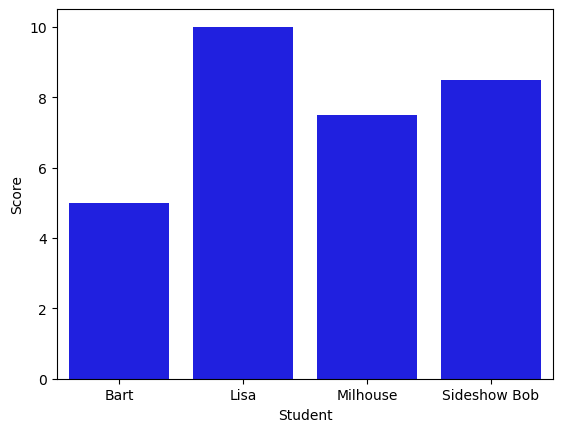

In [29]:
sns.barplot(data=df1, x="Student", y="Score", color="blue")

### Sales by month
Bar plot of sales by month.

<AxesSubplot:xlabel='Month', ylabel='sales (£)'>

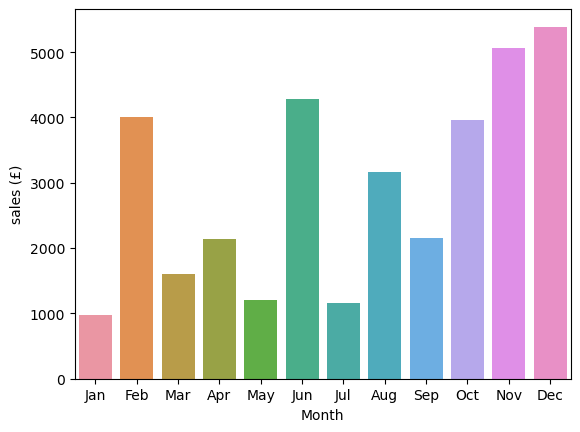

In [30]:
sns.barplot(data=df2, x="Month", y="sales (£)")

Same barplot, now all bars in one colour:

<AxesSubplot:xlabel='Month', ylabel='sales (£)'>

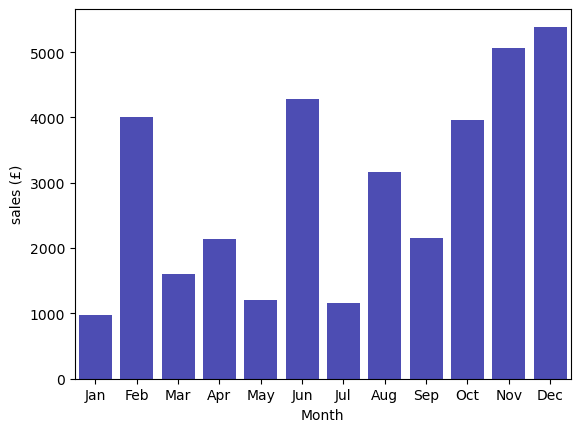

In [31]:
sns.barplot(data=df2, x="Month", y="sales (£)", color="blue", saturation=0.4)

Histogram showing distribution.

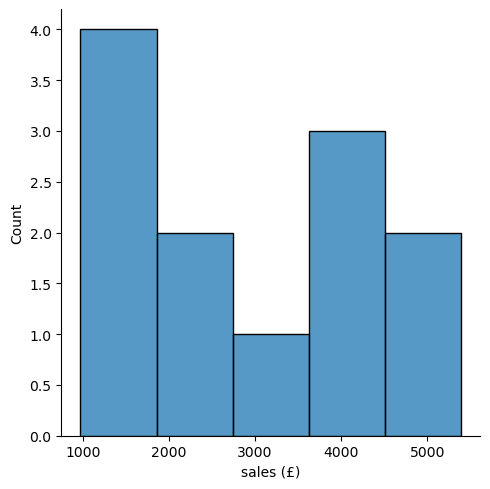

In [32]:
# Histogram of sales-column:
sns.displot(df2, x="sales (£)")

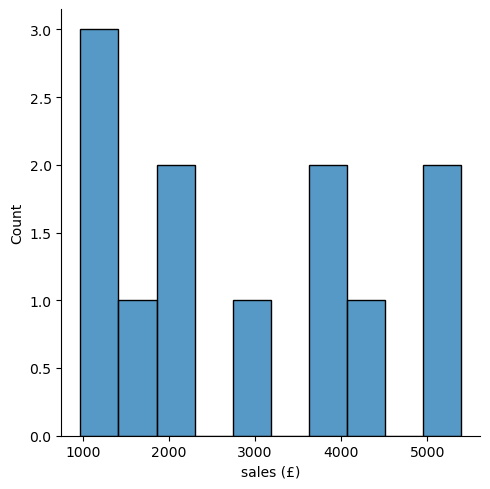

In [37]:
# Same histogram, with more bins (ranges):
sns.displot(df2, x="sales (£)", bins=10)

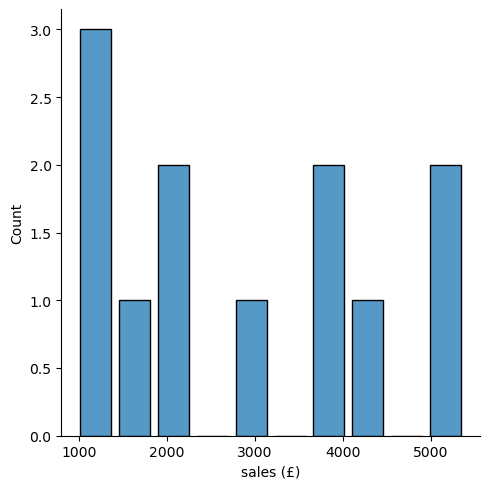

In [34]:
# Again, same histogram, with a gap between columns
sns.displot(df2, x="sales (£)", bins=10, shrink=.8)